In [13]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/uefa-goal-2024/goalscorers.csv


# Football Player Goal Analysis

# **Problem Statement**

The goal analysis aims to provide comprehensive insights into the performance and patterns of goals scored during the 2024 UEFA EURO tournament. This analysis focuses on understanding various aspects such as goal distribution across teams, scoring trends over time, effectiveness in home versus away matches, and the impact of key players on goal outcomes. 

# Objective

The objective of goal analysis is to deeply examine and understand various facets related to goals scored during the 2024 UEFA EURO tournament. This analysis serves several key purposes:

1. Performance Evaluation: Assess the effectiveness of teams in scoring goals and identify top-performing teams based on goal metrics.
1. 
1. Player Assessment: Evaluate individual players based on their goal-scoring contributions and identify top goal scorers.
1. 
1. Tactical Insights: Gain insights into goal-scoring patterns such as distribution across matches, periods, and playing styles (e.g., set pieces, open play).
1. 
1. Strategic Planning: Provide data-driven insights to coaches and analysts to optimize team strategies, improve goal-scoring efficiency, and mitigate vulnerabilities.



Overall, goal analysis aims to provide actionable insights that enhance decision-making, improve team performance, and contribute to a deeper understanding of the dynamics of goal-scoring in elite football tournaments like the UEFA EURO

# Methodology

1. Data Cleaning and Preparation
1. Exploratory Data Analysis (EDA)
1. Statistical Analysis
1. Player and Team Performance Evaluation
1. Correlation and Regression Analysis
1. Visualization and Reporting




# Key Findings


Top Goal Scorers: Identification of the players with the highest number of goals scored throughout the tournament.
Effectiveness in Home vs. Away Matches: Assessment of teams' goal-scoring performance in home matches compared to away matches.
Goal Types: Breakdown of goals scored by type (e.g., penalties, own goals) and their impact on match outcomes.

Scoring Patterns: Identification of any recurring patterns or trends in goal-scoring behavior, such as scoring frequency in certain minutes or phases of the game.

Player Efficiency: Evaluation of player efficiency metrics, such as goals per shot ratio or goals per game, to assess individual player performances.

Impact on Match Results: Analysis of how goals correlate with match results (e.g., wins, losses, draws) and their influence on team standings

# Conclusion

This notebook serves as a comprehensive tool for football player goal analysis

In [14]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

Initial data analysis

In [15]:
df = pd.read_csv('/kaggle/input/uefa-goal-2024/goalscorers.csv')
print(df.head())

         date  home_team away_team       team            scorer  minute  \
0  1916-07-02      Chile   Uruguay    Uruguay   José Piendibene    44.0   
1  1916-07-02      Chile   Uruguay    Uruguay  Isabelino Gradín    55.0   
2  1916-07-02      Chile   Uruguay    Uruguay  Isabelino Gradín    70.0   
3  1916-07-02      Chile   Uruguay    Uruguay   José Piendibene    75.0   
4  1916-07-06  Argentina     Chile  Argentina     Alberto Ohaco     2.0   

   own_goal  penalty  
0     False    False  
1     False    False  
2     False    False  
3     False    False  
4     False    False  


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44178 entries, 0 to 44177
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   date       44178 non-null  object 
 1   home_team  44178 non-null  object 
 2   away_team  44178 non-null  object 
 3   team       44178 non-null  object 
 4   scorer     44129 non-null  object 
 5   minute     43919 non-null  float64
 6   own_goal   44178 non-null  bool   
 7   penalty    44178 non-null  bool   
dtypes: bool(2), float64(1), object(5)
memory usage: 2.1+ MB


In [17]:
df.isnull().sum()

date           0
home_team      0
away_team      0
team           0
scorer        49
minute       259
own_goal       0
penalty        0
dtype: int64

The description of each columns

1. date: The date when the match took place.
1. home_team: The name of the team that played at their home venue.
1. away_team: The name of the team that played away from their home venue.
1. team: The name of the team that scored the goal.
1. scorer: The name of the player who scored the goal.
1. minute: The minute during the match when the goal was scored.
1. own_goal: Indicates if the goal was an own goal (Yes/No or True/False).
1. penalty: Indicates if the goal was scored from a penalty kick (Yes/No or True/False).

In [18]:
df.shape

(44178, 8)

Lets drop the null values

In [19]:
df = df.dropna()

In [20]:
df.shape

(43918, 8)

In [21]:
# Convert 'date' to datetime format
df['date'] = pd.to_datetime(df['date'])
df.head(5)

,date,home_team,away_team,team,scorer,minute,own_goal,penalty
0,1916-07-02,Chile,Uruguay,Uruguay,José Piendibene,44.0,False,False
1,1916-07-02,Chile,Uruguay,Uruguay,Isabelino Gradín,55.0,False,False
2,1916-07-02,Chile,Uruguay,Uruguay,Isabelino Gradín,70.0,False,False
3,1916-07-02,Chile,Uruguay,Uruguay,José Piendibene,75.0,False,False
4,1916-07-06,Argentina,Chile,Argentina,Alberto Ohaco,2.0,False,False


In [22]:
df.columns

Index(['date', 'home_team', 'away_team', 'team', 'scorer', 'minute',
       'own_goal', 'penalty'],
      dtype='object')

# 1. Descriptive Statistics:


 **Frequency Distribution**

In [23]:
# Frequency Distribution
print(df['home_team'].value_counts())


home_team
Brazil              1021
Argentina            985
Germany              791
Mexico               706
France               664
                    ... 
Yemen DPR              5
Somalia                5
Saarland               4
Vietnam Republic       4
South Sudan            4
Name: count, Length: 220, dtype: int64


In [24]:
print(df['away_team'].value_counts())


away_team
Uruguay          782
Paraguay         656
Spain            565
Germany          562
Peru             561
                ... 
Eritrea           17
Yemen DPR         15
Saarland           8
South Sudan        5
French Guiana      3
Name: count, Length: 220, dtype: int64


In [25]:
print(df['team'].value_counts())


team
Brazil           1046
Germany           970
Argentina         941
Spain             883
Mexico            851
                 ... 
Brunei              4
Somalia             3
Anguilla            2
South Sudan         2
French Guiana       2
Name: count, Length: 220, dtype: int64


In [26]:
print(df['scorer'].value_counts())


scorer
Cristiano Ronaldo      108
Robert Lewandowski      62
Romelu Lukaku           60
Harry Kane              56
Lionel Messi            54
                      ... 
Aurelio Domínguez        1
Sandy Walsh              1
Abdulla Yusuf Helal      1
Joel Kojo                1
Faisal Halim             1
Name: count, Length: 14197, dtype: int64


In [27]:
print(df['own_goal'].value_counts())


own_goal
False    43105
True       813
Name: count, dtype: int64


In [28]:
print(df['penalty'].value_counts())

penalty
False    40975
True      2943
Name: count, dtype: int64


**Data Visualization**

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


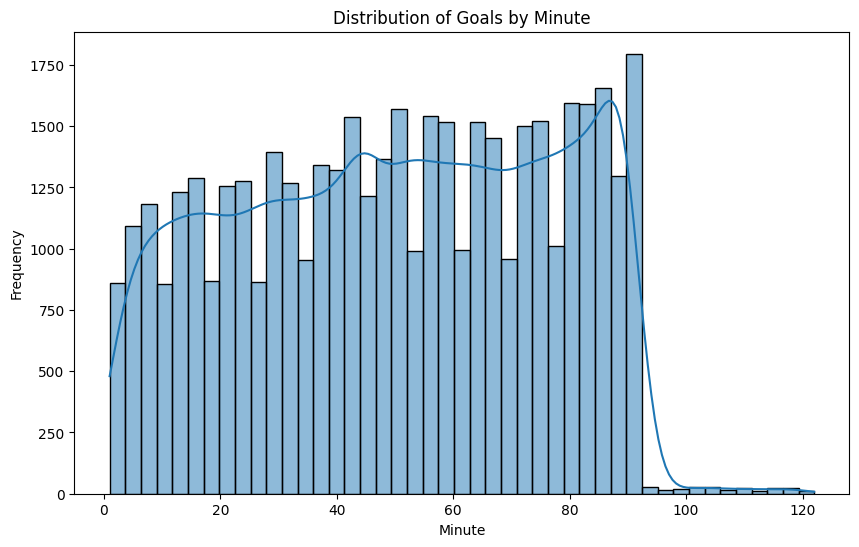

In [29]:
# Distribution of Goals Over Time
plt.figure(figsize=(10, 6))
sns.histplot(df['minute'], bins=45, kde=True)
plt.title('Distribution of Goals by Minute')
plt.xlabel('Minute')
plt.ylabel('Frequency')
plt.show()

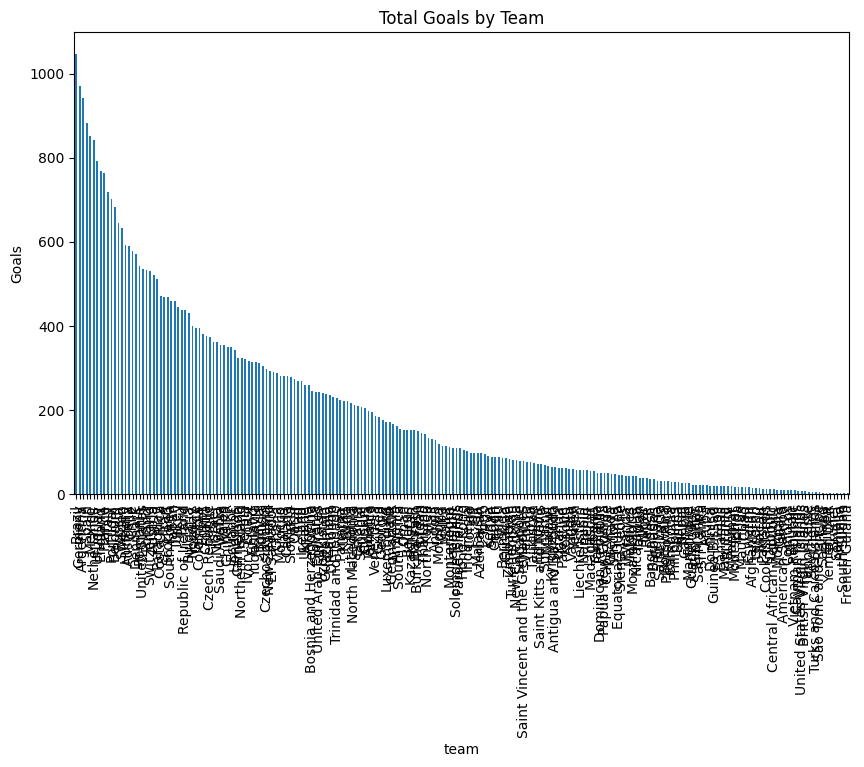

In [30]:
# Goals by Team
plt.figure(figsize=(10, 6))
df['team'].value_counts().plot(kind='bar')
plt.title('Total Goals by Team')
plt.xlabel('team')
plt.ylabel('Goals')
plt.show()

# Home vs Away Goals
home_goals = df[df['team'] == df['home_team']]
away_goals = df[df['team'] == df['away_team']]



/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


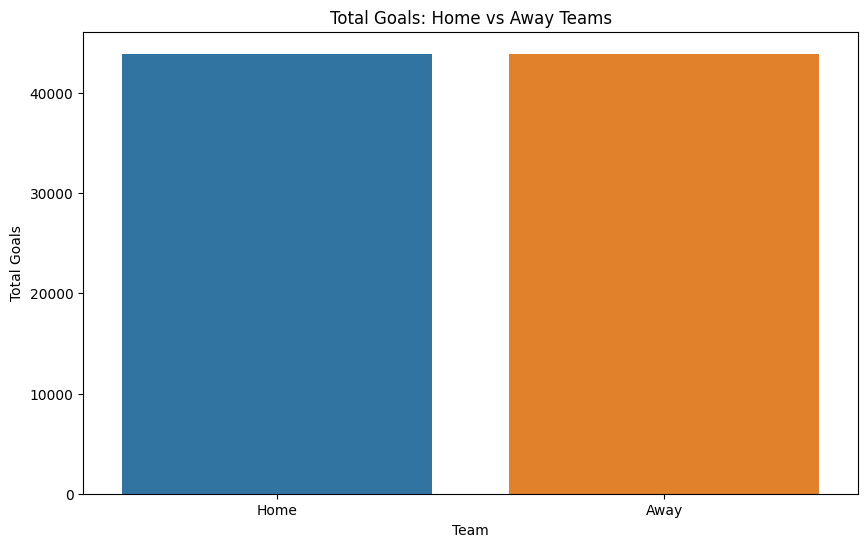

In [31]:
# Total Goals by Home vs Away Teams
total_goals = df.groupby('team')[['home_team', 'away_team']].apply(lambda x: x.notna().sum())
total_goals = total_goals.reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(x=['Home', 'Away'], y=total_goals[['home_team', 'away_team']].sum().values)
plt.title('Total Goals: Home vs Away Teams')
plt.xlabel('Team')
plt.ylabel('Total Goals')
plt.show()


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


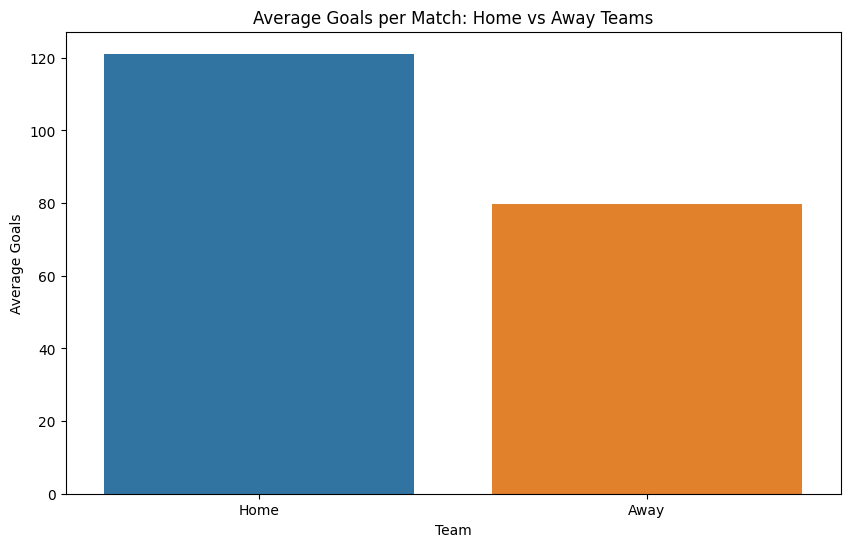

In [32]:
# Average Goals per Match by Home vs Away Teams
avg_goals_home = df[df['team'] == df['home_team']].groupby('home_team')['minute'].count().mean()
avg_goals_away = df[df['team'] == df['away_team']].groupby('away_team')['minute'].count().mean()

plt.figure(figsize=(10, 6))
sns.barplot(x=['Home', 'Away'], y=[avg_goals_home, avg_goals_away])
plt.title('Average Goals per Match: Home vs Away Teams')
plt.xlabel('Team')
plt.ylabel('Average Goals')
plt.show()

**Time-Based Analysis**

/tmp/ipykernel_34/2130974254.py:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  goals_over_time = df.set_index('date').resample('M').size()
/tmp/ipykernel_34/2130974254.py:3: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  home_goals_over_time = df[df['team'] == df['home_team']].set_index('date').resample('M').size()
/tmp/ipykernel_34/2130974254.py:4: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  away_goals_over_time = df[df['team'] == df['away_team']].set_index('date').resample('M').size()


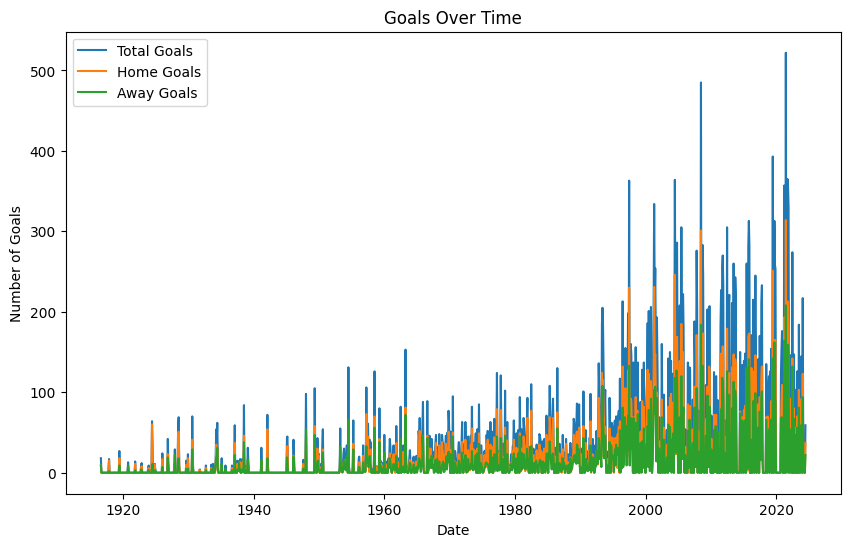

In [33]:
# Goals Over Time
goals_over_time = df.set_index('date').resample('M').size()
home_goals_over_time = df[df['team'] == df['home_team']].set_index('date').resample('M').size()
away_goals_over_time = df[df['team'] == df['away_team']].set_index('date').resample('M').size()

plt.figure(figsize=(10, 6))
plt.plot(goals_over_time.index, goals_over_time, label='Total Goals')
plt.plot(home_goals_over_time.index, home_goals_over_time, label='Home Goals')
plt.plot(away_goals_over_time.index, away_goals_over_time, label='Away Goals')
plt.title('Goals Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Goals')
plt.legend()
plt.show()

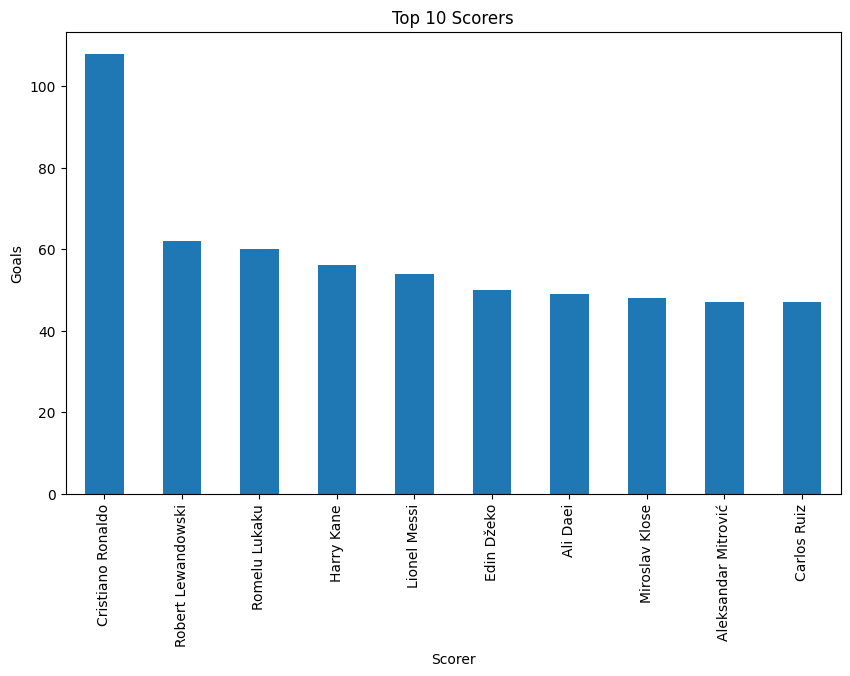

In [34]:
# Top Scorers
plt.figure(figsize=(10, 6))
df['scorer'].value_counts().head(10).plot(kind='bar')
plt.title('Top 10 Scorers')
plt.xlabel('Scorer')
plt.ylabel('Goals')
plt.show()

The above bar graph shows the top scorers

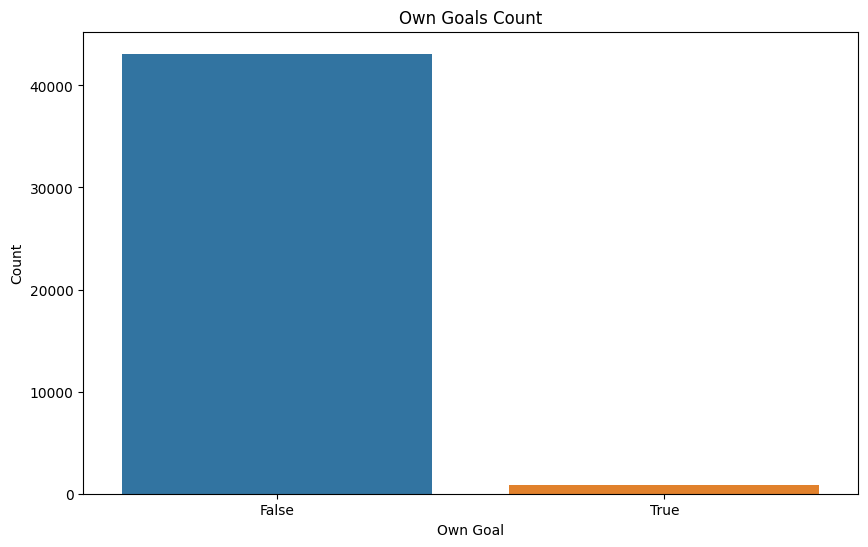

In [35]:
# Own Goals and Penalty Analysis
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='own_goal')
plt.title('Own Goals Count')
plt.xlabel('Own Goal')
plt.ylabel('Count')
plt.show()

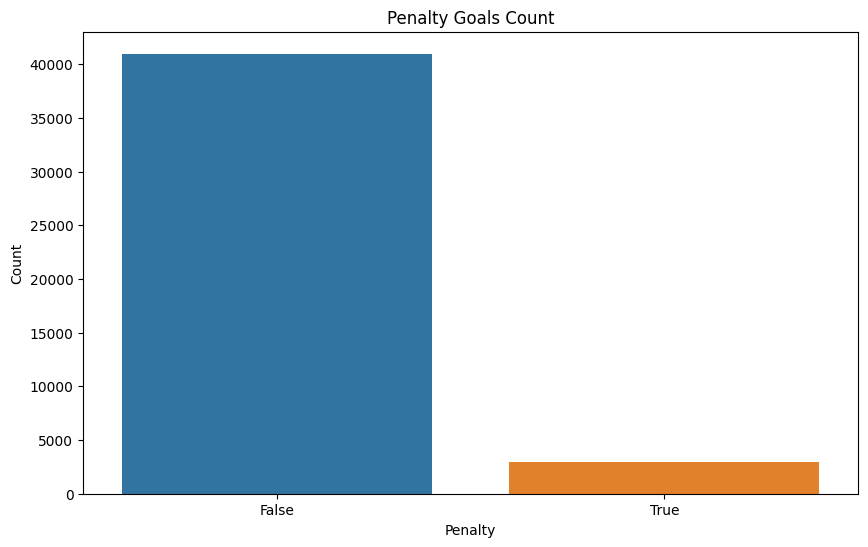

In [36]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='penalty')
plt.title('Penalty Goals Count')
plt.xlabel('Penalty')
plt.ylabel('Count')
plt.show()


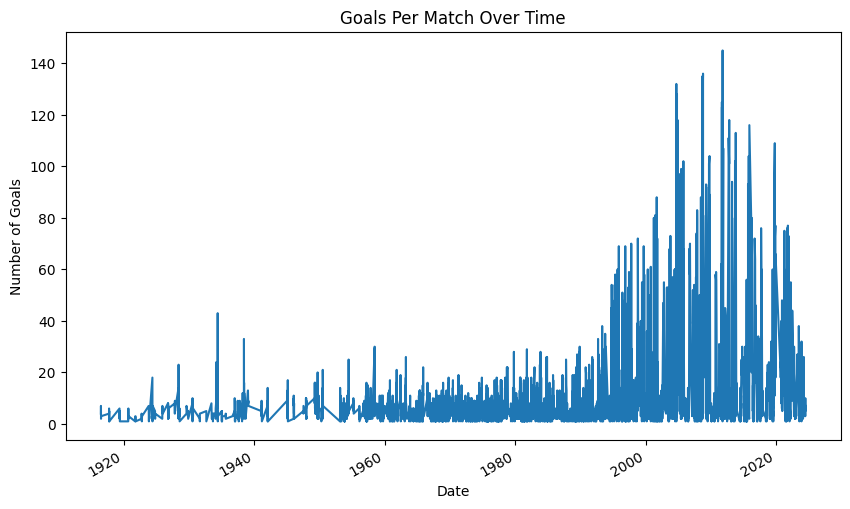

In [37]:
# Goals Per Match
goals_per_match = df.groupby('date').size()
plt.figure(figsize=(10, 6))
goals_per_match.plot(kind='line')
plt.title('Goals Per Match Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Goals')
plt.show()


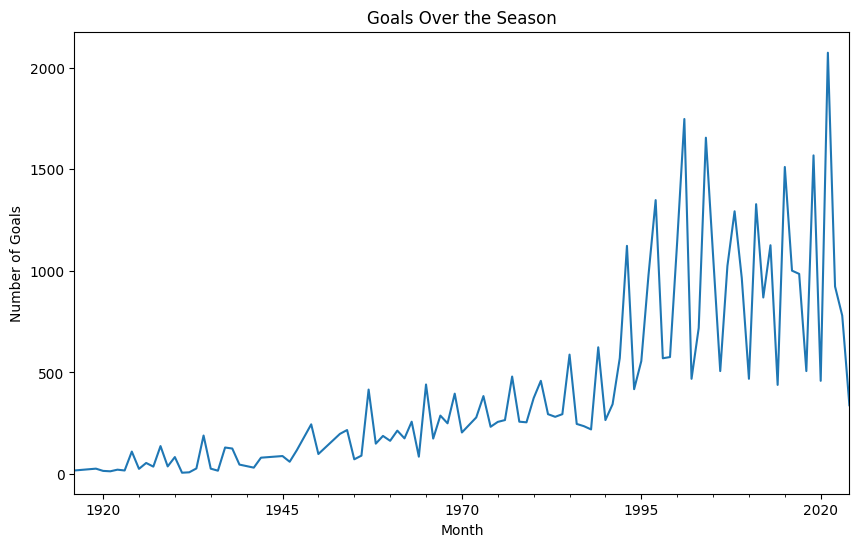

In [38]:
# Goals Over Season
plt.figure(figsize=(10, 6))
df.groupby(df['date'].dt.to_period("Y")).size().plot(kind='line')
plt.title('Goals Over the Season')
plt.xlabel('Month')
plt.ylabel('Number of Goals')
plt.show()

Maybe since 2024 data is less ,its not showing in graph

Analysis done on the scorer in datset

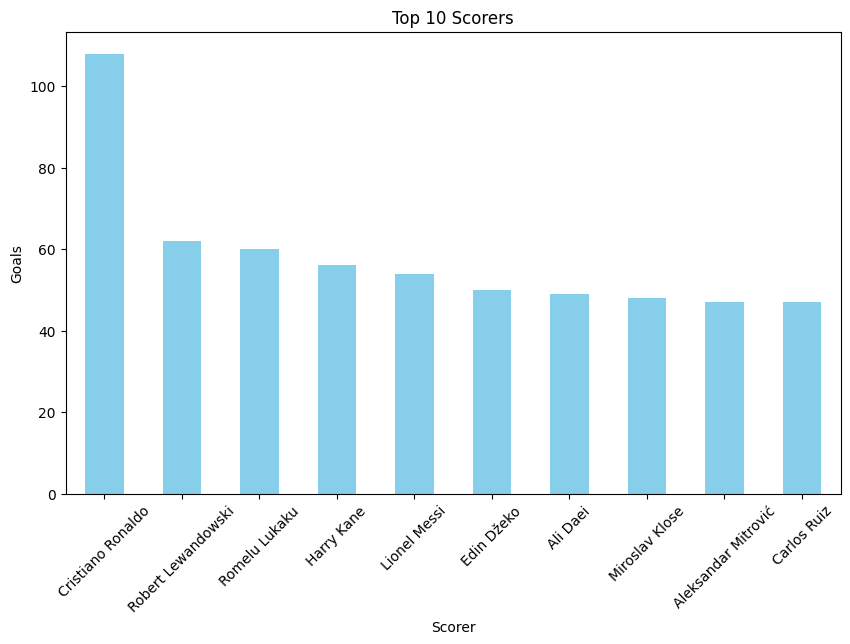

In [39]:
# Top Scorers
top_scorers = df['scorer'].value_counts().head(10)

plt.figure(figsize=(10, 6))
top_scorers.plot(kind='bar', color='skyblue')
plt.title('Top 10 Scorers')
plt.xlabel('Scorer')
plt.ylabel('Goals')
plt.xticks(rotation=45)
plt.show()

/tmp/ipykernel_34/1642740503.py:7: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  goals_over_time = df_top_scorers[df_top_scorers['scorer'] == scorer].set_index('date').resample('M').size()
/tmp/ipykernel_34/1642740503.py:7: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  goals_over_time = df_top_scorers[df_top_scorers['scorer'] == scorer].set_index('date').resample('M').size()
/tmp/ipykernel_34/1642740503.py:7: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  goals_over_time = df_top_scorers[df_top_scorers['scorer'] == scorer].set_index('date').resample('M').size()
/tmp/ipykernel_34/1642740503.py:7: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  goals_over_time = df_top_scorers[df_top_scorers['scorer'] == scorer].set_index('date').resample('M').size()
/tmp/ipykernel_34/164274

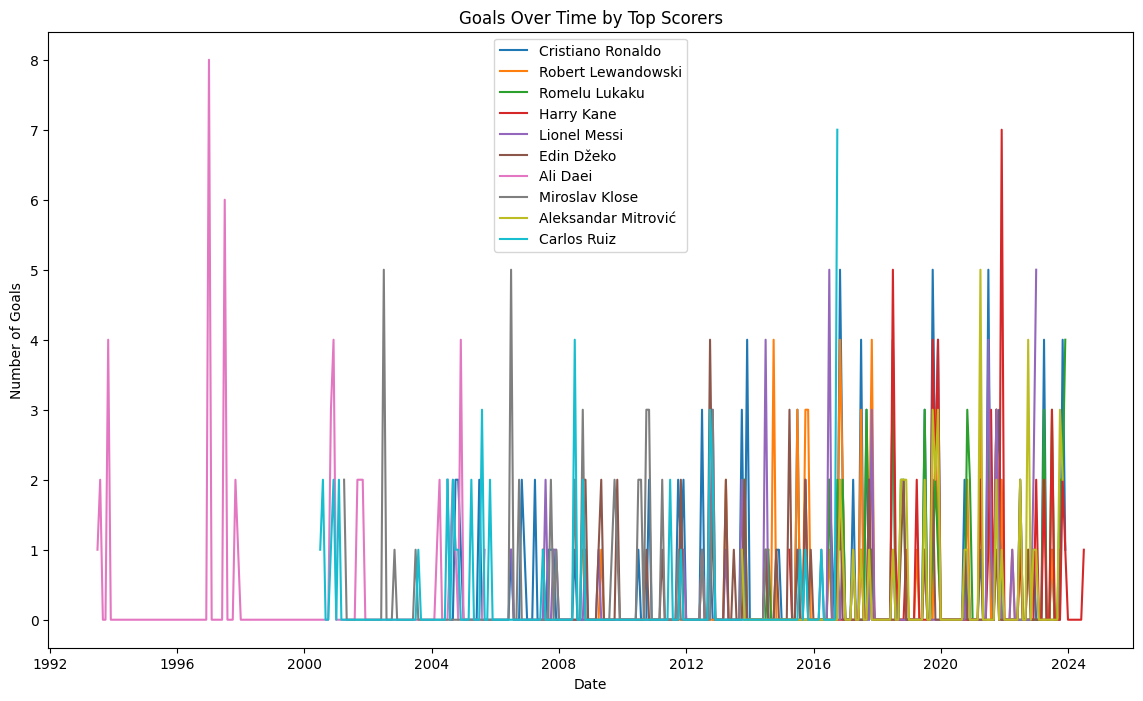

In [40]:
# Goals Over Time by Top Scorers
top_scorers_list = top_scorers.index.tolist()
df_top_scorers = df[df['scorer'].isin(top_scorers_list)]

plt.figure(figsize=(14, 8))
for scorer in top_scorers_list:
    goals_over_time = df_top_scorers[df_top_scorers['scorer'] == scorer].set_index('date').resample('M').size()
    plt.plot(goals_over_time.index, goals_over_time, label=scorer)
plt.title('Goals Over Time by Top Scorers')
plt.xlabel('Date')
plt.ylabel('Number of Goals')
plt.legend()
plt.show()

<Figure size 1400x800 with 0 Axes>

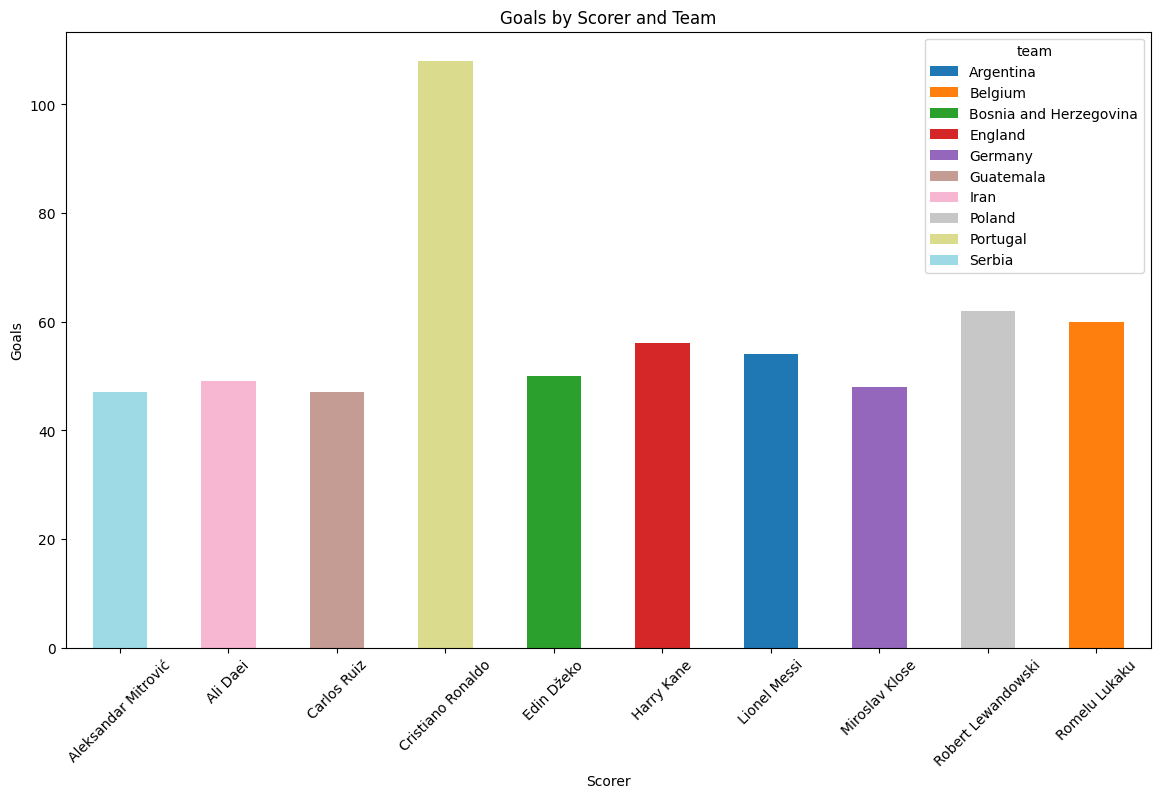

In [41]:
# Goals by Scorer and Team
goals_by_team = pd.pivot_table(df_top_scorers, values='minute', index='scorer', columns='team', aggfunc='count', fill_value=0)

plt.figure(figsize=(14, 8))
goals_by_team.plot(kind='bar', stacked=True, colormap='tab20', figsize=(14, 8))
plt.title('Goals by Scorer and Team')
plt.xlabel('Scorer')
plt.ylabel('Goals')
plt.xticks(rotation=45)
plt.show()

As we can see Christiano Ronaldo scored highest goal with team Portugal

/tmp/ipykernel_34/696497148.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_top_scorers['home_or_away'] = df_top_scorers.apply(lambda x: 'Home' if x['team'] == x['home_team'] else 'Away', axis=1)


<Figure size 1400x800 with 0 Axes>

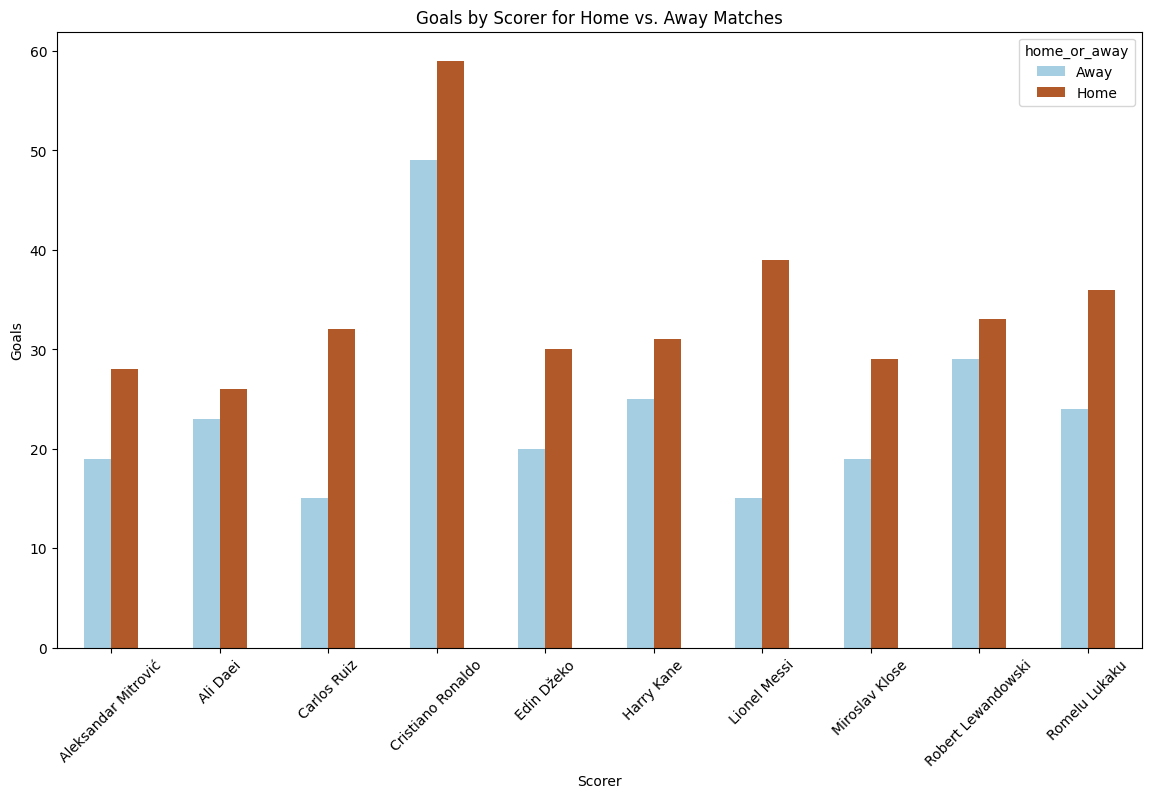

In [42]:
# Goals by Scorer for Home vs. Away Matches
df_top_scorers['home_or_away'] = df_top_scorers.apply(lambda x: 'Home' if x['team'] == x['home_team'] else 'Away', axis=1)
goals_home_away = pd.pivot_table(df_top_scorers, values='minute', index='scorer', columns='home_or_away', aggfunc='count', fill_value=0)

plt.figure(figsize=(14, 8))
goals_home_away.plot(kind='bar', colormap='Paired', figsize=(14, 8))
plt.title('Goals by Scorer for Home vs. Away Matches')
plt.xlabel('Scorer')
plt.ylabel('Goals')
plt.xticks(rotation=45)
plt.show()

The above graph also tells that Cristiano Ronaldo scored high goals,after that Lionel Messi

In [45]:
df.shape

(43918, 9)

In [47]:
#to store cleaned dataset
df.to_csv('goals_data.csv', index=False)